In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial import KDTree
import cv2


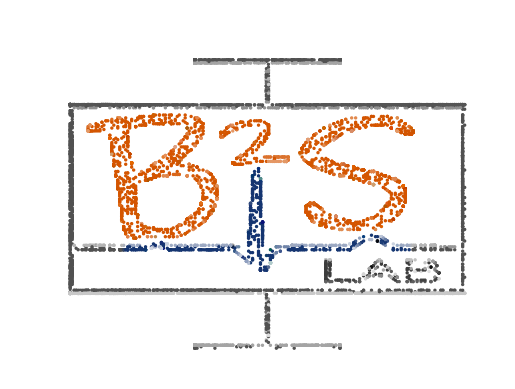

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial import KDTree
import cv2

# Load the logo as a color image
logo_path = "b2slab.png"
logo_img = cv2.imread(logo_path, cv2.IMREAD_COLOR)  # Load in BGR color
logo_img = cv2.flip(logo_img, 0)  # Flip vertically to correct orientation
logo_img = cv2.resize(logo_img, (200, 200))  # Resize for processing

# Extract non-white pixels (keep only important logo details)
mask = np.all(logo_img < [230, 230, 230], axis=-1)  # Avoid white background
y_indices, x_indices = np.where(mask)

# Extract corresponding colors (convert BGR to RGB)
colors = logo_img[y_indices, x_indices][:, ::-1] / 255.0  # Normalize RGB colors

# Convert (x, y) coordinates into a NumPy array
logo_points = np.vstack((x_indices, y_indices)).T

# Normalize logo points for scaling
logo_points = logo_points - np.mean(logo_points, axis=0)  # Center the points
logo_points = logo_points / np.max(np.abs(logo_points), axis=0)  # Normalize to [-1, 1]

# Generate initial random points and random colors
num_points = len(logo_points)
random_points = np.random.uniform(-1, 1, (num_points, 2))
random_colors = np.random.rand(num_points, 3)  # Random initial colors

# KDTree for nearest neighbor movement
logo_tree = KDTree(logo_points)

# Initialize figure
fig, ax = plt.subplots()
scat = ax.scatter(random_points[:, 0], random_points[:, 1], c=random_colors, s=2)

# Update function for animation
def update(frame):
    global random_points, random_colors
    _, nearest_idx = logo_tree.query(random_points)
    target_positions = logo_points[nearest_idx]
    target_colors = colors[nearest_idx]

    # Move points towards their target positions
    random_points += (target_positions - random_points) * 0.05  # Adjust speed factor

    # Gradually transition colors
    random_colors += (target_colors - random_colors) * 0.1

    # Update scatter plot
    scat.set_offsets(random_points)
    scat.set_facecolors(random_colors)
    return scat,

# Create animation
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.axis("off")

ani = animation.FuncAnimation(fig, update, frames=100, interval=50, blit=False)

# Save animation as a video
ani.save("b2sanim.mp4", fps=30, dpi=200)

plt.show()


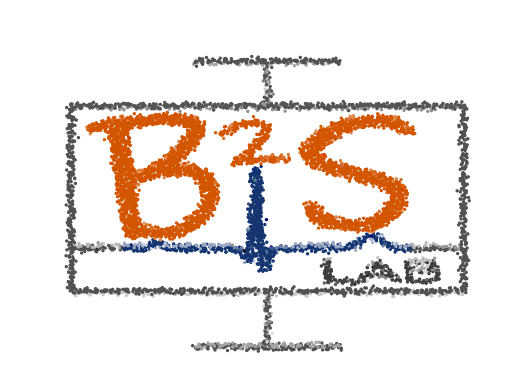

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial import KDTree
import cv2
import time

# Load the logo as a color image
logo_path = "b2slab.png"
logo_img = cv2.imread(logo_path, cv2.IMREAD_COLOR)  # Load in BGR color
logo_img = cv2.flip(logo_img, 0)  # Flip vertically to correct orientation
logo_img = cv2.resize(logo_img, (200, 200))  # Resize for processing

# Extract non-white pixels (keep only important logo details)
mask = np.all(logo_img < [230, 230, 230], axis=-1)  # Avoid white background
y_indices, x_indices = np.where(mask)

# Extract corresponding colors (convert BGR to RGB)
colors = logo_img[y_indices, x_indices][:, ::-1] / 255.0  # Normalize RGB colors

# Convert (x, y) coordinates into a NumPy array
logo_points = np.vstack((x_indices, y_indices)).T

# Normalize logo points for scaling
logo_points = logo_points - np.mean(logo_points, axis=0)  # Center the points
logo_points = logo_points / np.max(np.abs(logo_points), axis=0)  # Normalize to [-1, 1]

# Generate initial random points and random colors
num_points = len(logo_points)
random_points = np.random.uniform(-1, 1, (num_points, 2))
random_colors = np.random.rand(num_points, 3)  # Random initial colors

# Create shuffled versions of the logo positions
shuffled_logo_1 = logo_points[np.random.permutation(num_points)]
shuffled_logo_2 = logo_points[np.random.permutation(num_points)]

# KDTree for nearest neighbor movement
logo_tree = KDTree(logo_points)

# Animation States
state = 0  # 0 = random, 1 = logo, 2 = shuffled_1, 3 = shuffled_2, then repeat
state_duration = 50  # Number of frames each phase lasts
pause_duration = 10  # Number of frames to hold the logo
current_step = 0

# Initialize figure
fig, ax = plt.subplots()
scat = ax.scatter(random_points[:, 0], random_points[:, 1], c=random_colors, s=2)

# Smooth transition control
def smooth_curve(t):
    """ Creates an ease-in-out effect for movement """
    return 3 * t**2 - 2 * t**3  # Sigmoid-like smooth step function

# Update function for animation
def update(frame):
    global random_points, random_colors, state, current_step

    # Determine target positions based on state
    if state == 0:
        target_positions = random_points  # Stay random
    elif state == 1:
        target_positions = logo_points  # Move to the logo
    elif state == 2:
        target_positions = shuffled_logo_1  # Move to shuffled logo
    elif state == 3:
        target_positions = shuffled_logo_2  # Move to another shuffled version
    
    # Compute movement factor
    t = smooth_curve(current_step / state_duration)
    random_points += (target_positions - random_points) * 0.05  # Smooth movement
    random_points += np.random.uniform(-0.005, 0.005, random_points.shape)  # Small jitter effect

    # Gradually transition colors
    target_colors = colors if state != 0 else np.random.rand(num_points, 3)
    random_colors += (target_colors - random_colors) * 0.1

    # Update scatter plot
    scat.set_offsets(random_points)
    scat.set_facecolors(random_colors)

    # Manage state transitions
    current_step += 1
    if current_step >= state_duration:
        if state == 1 and current_step >= state_duration + pause_duration:
            state = 2  # Move to shuffled_1
            current_step = 0
        elif state == 2:
            state = 3  # Move to shuffled_2
            current_step = 0
        elif state == 3:
            state = 0  # Back to random
            current_step = 0
        else:
            state = 1  # Move to the logo
            current_step = 0

    return scat,

# Create animation
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.axis("off")

ani = animation.FuncAnimation(fig, update, frames=500, interval=50, blit=False)

# Save animation as a video
#ani.save("b2s_cycle_animation.mp4", fps=30, dpi=200)
ani.save("b2s_cycle_animation.webm", fps=30, dpi=200, codec="libvpx-vp9", extra_args=["-pix_fmt", "yuva420p"])

plt.show()
